# Data analysis: bicincitta_parma - Dashboard
A. Heuillet & F. Couthouis

In [7]:
from datetime import datetime,timedelta
from zipfile import ZipFile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

pd.plotting.register_matplotlib_converters()
plt.style.use("seaborn-dark")
sns.set_context("paper")

zipfile_name = "clean.zip"
datafile_path = "Data/15. Repubblica/2014-12-08 16:00:00.csv.gz"

try:
    with ZipFile(zipfile_name) as myzip:
        with myzip.open(datafile_path) as datafile:
            df = pd.read_csv(datafile, compression='gzip', sep=';', parse_dates=["Timestamp"])
except Exception as e:
    print("Error: data loading failed. ", e)

display(df.describe())
df.head()


,Bikes,Slots,Total,Humidity,Pressure,WindDeg,WindSpeed,TemperatureTemp
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000
mean,3.057762,6.758123,9.815884,83.043321,979.417617,100.431933,1.218123,3.328303
std,1.607361,1.923156,0.388280,14.895467,34.448889,89.539335,0.648080,4.363748
min,2.000000,2.000000,9.000000,50.000000,944.750000,12.004000,0.520000,-5.120000
25%,2.000000,6.000000,10.000000,73.000000,947.140000,41.005200,0.710000,0.180000
50%,2.000000,8.000000,10.000000,88.000000,955.490000,65.500400,0.870000,2.710000
75%,4.000000,8.000000,10.000000,95.000000,1018.000000,106.004000,1.760000,8.000000
max,7.000000,8.000000,10.000000,100.000000,1023.000000,354.000000,2.720000,11.000000


,Timestamp,Station,Bikes,Slots,Total,Status,Humidity,Pressure,Rain,WindDeg,WindSpeed,Snow,TemperatureTemp
0,2014-12-08 16:00:00,15. Repubblica,2,8,10,clouds,92.0,948.0,{},106.004,0.71,{},5.77
1,2014-12-08 16:10:00,15. Repubblica,2,8,10,clouds,92.0,948.0,{},106.004,0.71,{},5.77
2,2014-12-08 16:20:00,15. Repubblica,2,8,10,clouds,92.0,948.0,{},106.004,0.71,{},5.77
3,2014-12-08 16:30:00,15. Repubblica,2,8,10,clouds,92.0,948.0,{},106.004,0.71,{},5.77
4,2014-12-08 16:40:00,15. Repubblica,2,8,10,clouds,92.0,948.0,{},106.004,0.71,{},5.77


In [38]:
#Select only one day

#Timestamp of the first row of the day (atr midnight)
start_date = df[df['Timestamp'].apply(lambda x :x.hour == 0)]['Timestamp'].iloc[0] 
end_date = start_date + timedelta(days=1)
mask = (df['Timestamp'] >= start_date) & (df['Timestamp'] < end_date)

df_one_day = df.loc[mask]

date_str = start_date.strftime('%A %d %B %Y')
stat_name = df['Station'].iloc[0][4:]

In [94]:
df_one_day.index = df_one_day['Timestamp']
df_one_day = df_one_day.resample('H').mean().reset_index()
df_one_day["Hour"] = df_one_day["Timestamp"].apply(lambda x: x.hour)
df_one_day["Status"] = df["Status"]


def draw_plot(x, y, axis, title=""):
    ax = sns.lineplot(x,y, ax=axis)
    ax.set_title(title, size='x-large')
    
def draw_barplot(x,y, axis, title=""):
    ax = sns.barplot(x,y, ax=axis, palette="Blues_d")
    ax.set_title(title, size='x-large')

def draw_pie(x, axis, title=""):
    axis.pie(list(x.value_counts()), 
                    labels=list(x.unique()))
    axis.set_title(title, size='x-large')
    
def draw_violinplot(x, y,axis, title=""):
    ax = sns.violinplot(x, y,ax=axis)
    ax.set_title(title, size='x-large')

def draw_scatter(x, y,axis, title=""):
    ax = sns.scatterplot(x, y,color="navy",s=100, ax=axis)
    ax.set_title(title, size='x-large')

max_bikes = df_one_day["Total"].iloc[0].astype(int)

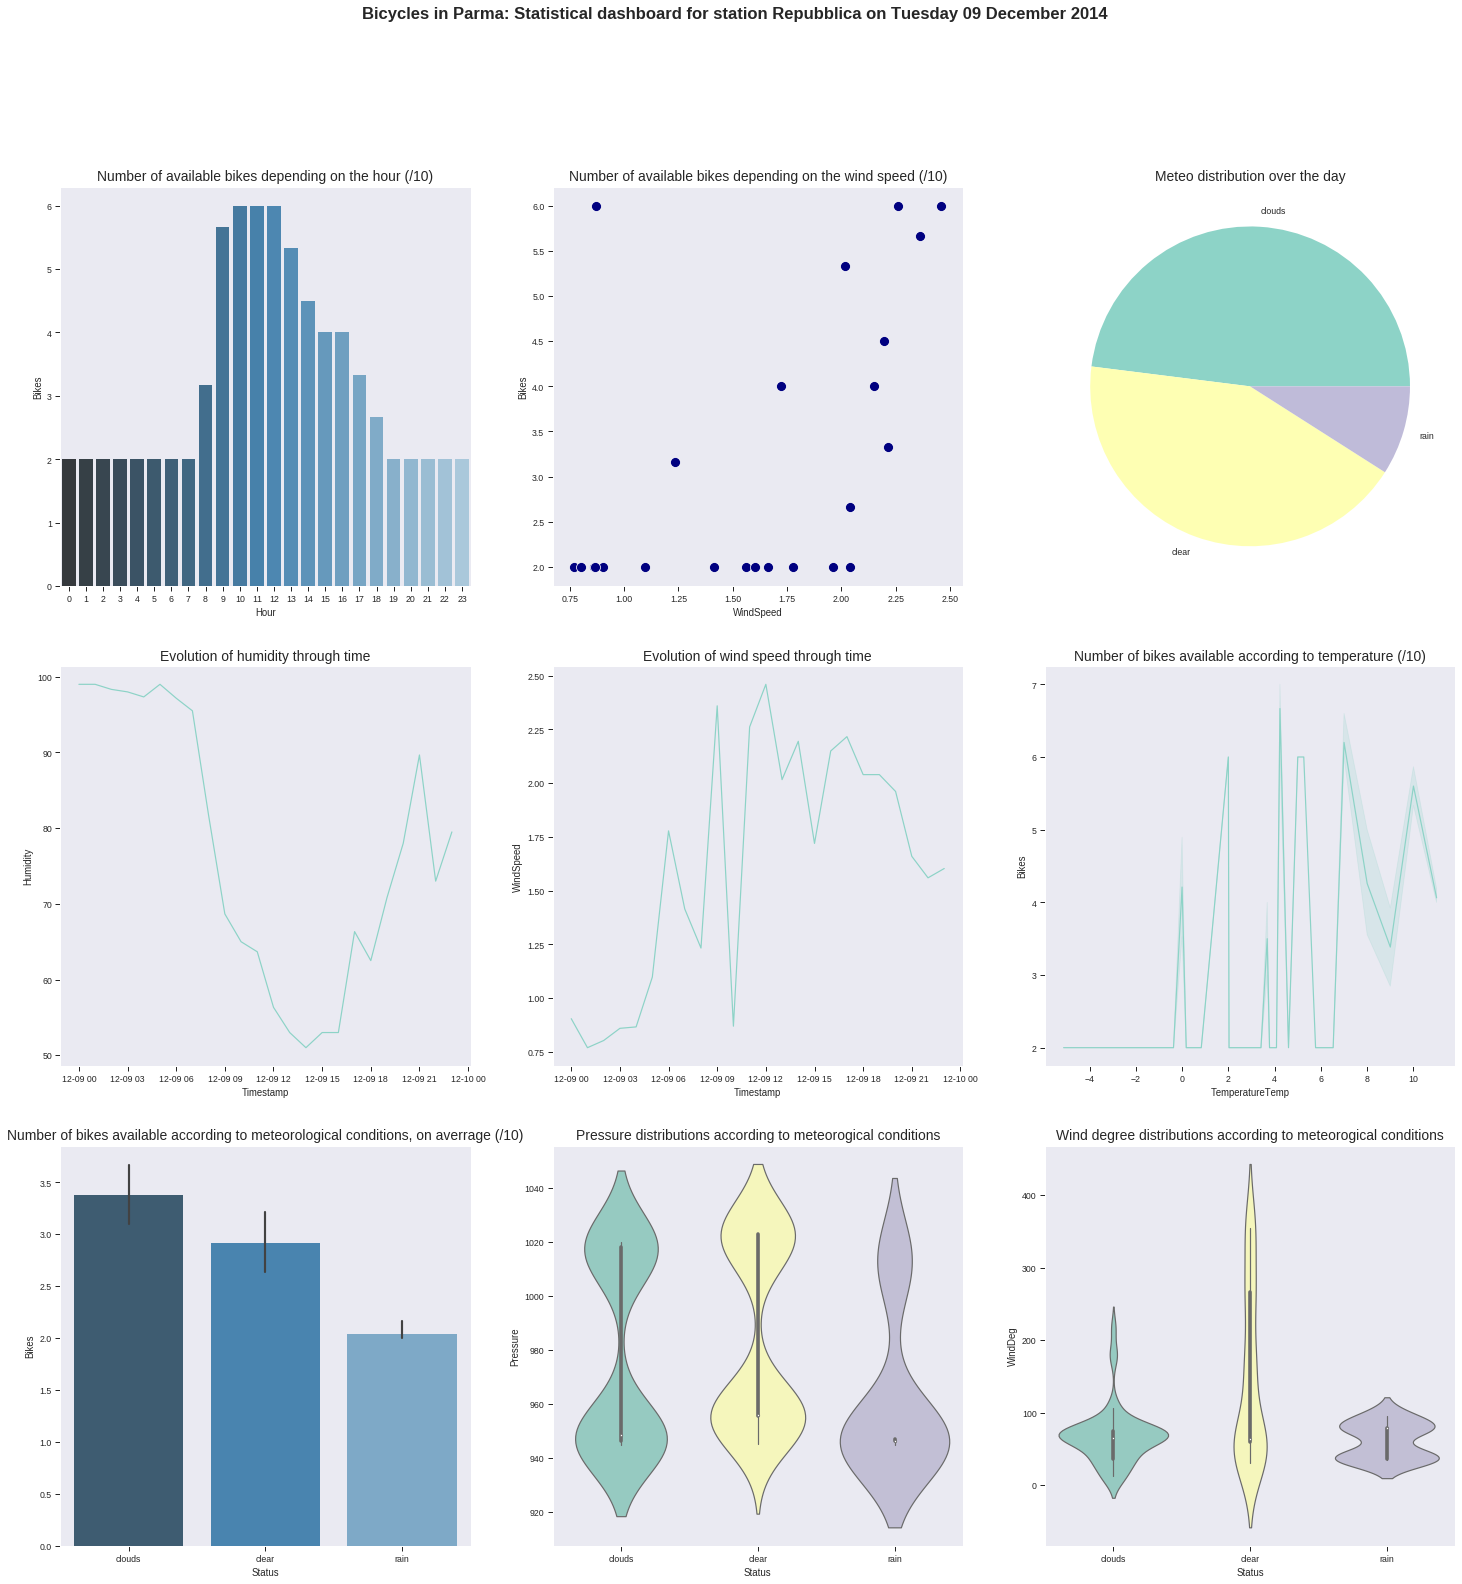

In [99]:
fig, axs = plt.subplots(nrows=3,ncols=3, figsize=(25, 25))
fig.suptitle(f"Bicycles in Parma: Statistical dashboard for station {stat_name} on {date_str}", size='xx-large', weight='bold')
draw_barplot(df_one_day["Hour"], df_one_day["Bikes"], axs[0][0], title=f"Number of available bikes depending on the hour (/{max_bikes})")
draw_scatter(df_one_day["WindSpeed"], df_one_day["Bikes"], axs[0][1], title=f"Number of available bikes depending on the wind speed (/{max_bikes})")
draw_pie(df["Status"], axs[0][2], title="Meteo distribution over the day")
draw_plot(df_one_day["Timestamp"], df_one_day["Humidity"], axs[1][0], title="Evolution of humidity through time")
draw_plot(df_one_day["Timestamp"], df_one_day["WindSpeed"], axs[1][1], title="Evolution of wind speed through time")

draw_plot(df["TemperatureTemp"],df["Bikes"], axs[1][2], title=f"Number of bikes available according to temperature (/{max_bikes})")

draw_barplot(df["Status"], df["Bikes"], axs[2][0], title=f"Number of bikes available according to meteorological conditions, on averrage (/{max_bikes})")
draw_violinplot(df["Status"], df["Pressure"],axs[2][1],title="Pressure distributions according to meteorogical conditions")
draw_violinplot(df["Status"], df["WindDeg"],axs[2][2],title="Wind degree distributions according to meteorogical conditions")